<img src="https://ri.lasa.com.br/img/2020/logo.png" width="600">

# reviews de produtos da loja Americas

Ele contém mais de 130 mil avaliações de clientes de comércio eletrônico, coletadas no site da Americanas.com entre janeiro e maio de 2018.

## Grupo

Alan Pereira, Diego Oliveira

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [2]:
#url = 'https://raw.githubusercontent.com/alanexplorer/NLP-b2w-reviews01/master/NLP-UFAL/dataset.csv'
url = 'dataset.csv'

In [3]:
df = pd.read_csv(url, index_col=0)

In [4]:
df

,recommend_to_a_friend,review_text
0,True,estou contente com a compra entrega rápida o ú...
1,True,por apenas reu consegui comprar esse lindo cop...
2,True,supera em agilidade e praticidade outras panel...
3,True,meu filho amou parece de verdade com tantos de...
4,True,a entrega foi no prazo as americanas estão de ...
...,...,...
132350,True,vale muito estou usando no controle do xbox e ...
132351,True,prático e barato super indico o produto para q...
132352,True,chegou antes do prazo previsto e corresponde a...
132353,False,material fraco poderia ser melhor ficou devend...


In [5]:
# Detela as linhas com informações faltando
df.dropna(inplace=True)
# reinicia a contagem das linhas
df.reset_index(drop=True, inplace=True)

# Pegando uma parte do bando de dados

In [6]:
# pega as 200 primeiras linhas de cada tipo, com texto de tamanho menor que 100 caracteres

recommend_true = df.loc[(df['recommend_to_a_friend'] == True) & (df['review_text'].str.len() < 100)].head(200) 
recommend_false = df.loc[(df['recommend_to_a_friend'] == False) & (df['review_text'].str.len() < 100)].head(200) 

In [7]:
# concatena
reviews = pd.concat([recommend_true, recommend_false])

In [8]:
# embaralha as linhas 
reviews = reviews.sample(frac=1).reset_index(drop=True)

In [9]:
reviews.rename(index={0: "recommend_to_a_friend"})
reviews.head

<bound method NDFrame.head of      recommend_to_a_friend                                        review_text
0                    False  tem até graça pagar mais de r  num produto  e ...
1                     True  minha neta está encantada com a boneca e a ent...
2                     True  superou expectativas  é excelente para jogos s...
3                    False  não superou minha espectativa o material do ap...
4                     True  o aparelho é potente e sua diversidade de ferr...
..                     ...                                                ...
395                   True  divertido prático e fabricado material de qual...
396                  False  fico no aguardo do produto é um absurdo o que ...
397                   True  melhor custo benefício cumpre o q promete cuid...
398                  False  poderiam arrumar outros tipos de remédio para ...
399                   True  aparelho de ótima qualidade e sem defeitos ent...

[400 rows x 2 columns]>

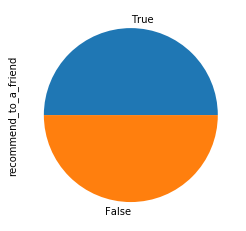

In [10]:
reviews["recommend_to_a_friend"].value_counts().plot.pie();

<Figure size 864x720 with 0 Axes>

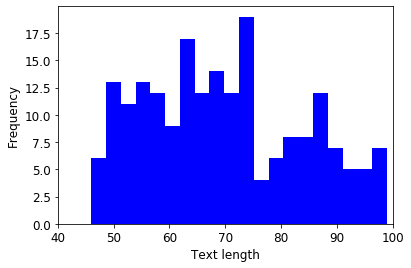

<Figure size 864x720 with 0 Axes>

In [11]:
text_lenth = reviews.loc[reviews['recommend_to_a_friend'] == True]['review_text'].str.len()

text_lenth.hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12, color="b")
plt.xlabel("Text length", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xlim([40,100])
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

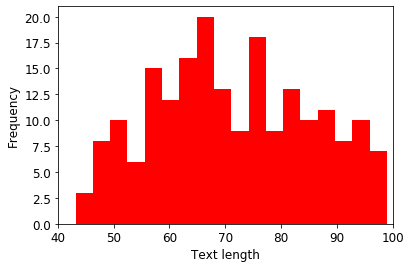

<Figure size 864x720 with 0 Axes>

In [12]:
text_lenth = reviews.loc[reviews['recommend_to_a_friend'] == False]['review_text'].str.len()

text_lenth.hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12, color="red")
plt.xlabel("Text length", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xlim([40,100])
plt.figure(figsize=(12,10))

# Remover os labels

In [13]:
backup = reviews.copy()
reviews.drop(columns=['recommend_to_a_friend'], inplace=True)

In [14]:
reviews

,review_text
0,tem até graça pagar mais de r num produto e ...
1,minha neta está encantada com a boneca e a ent...
2,superou expectativas é excelente para jogos s...
3,não superou minha espectativa o material do ap...
4,o aparelho é potente e sua diversidade de ferr...
...,...
395,divertido prático e fabricado material de qual...
396,fico no aguardo do produto é um absurdo o que ...
397,melhor custo benefício cumpre o q promete cuid...
398,poderiam arrumar outros tipos de remédio para ...


## 1. Realize um comparativo entre os métodos LDA, SVD e NMF para realizar modelagem de tópicos. Para cada método:

### a) empiricamente, tente identificar uma quantidade de tópicos adequada para seu problema;
### b) identifique as 5 palavras mais relevantes de cada tópico;
### c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).
### d) qual método apresentou melhores resultados, na sua opinião?

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [16]:
stop_words = stopwords.words('portuguese')
cv = CountVectorizer(max_features = 1000, stop_words = stop_words)
dictionary = cv.fit_transform(reviews['review_text'])
df_dictionary = pd.DataFrame(dictionary.toarray(), columns=cv.get_feature_names())

In [17]:
df_dictionary

,abre,absurdo,acabamento,acessível,achei,acima,aconselho,aconteceu,acordo,acrílico,...,água,áspera,óleo,ótima,ótimas,ótimo,ótimos,última,única,único
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Resposta usando LDA

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
lda_model = LatentDirichletAllocation(n_components=3, random_state=42, learning_method='online')

In [23]:
lda_data = lda_model.fit_transform(dictionary)

In [25]:
lda_model.components_.shape

(3, 1000)

In [26]:
lda_data.shape

(400, 3)

In [28]:
# Imprima as 10 principais palavras por tópico
n_words = 10
feature_names = cv.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: bla dia promoção pois outros queria oportunidade perder vim vi
Topic 1: produto recebi ainda nao chegou veio recomendo qualidade compra melhor
Topic 2: produto entrega bom qualidade prazo recomendo excelente ótimo super ótima


In [23]:
backup.head(5)

,recommend_to_a_friend,review_text
0,True,recebemos antes do prazo prometido o produto estava bem embalado e facil montagem
1,False,cancelarão meu pedido primeiro me vendem depois cancelam
2,False,meu produto ainda não foi entregue esta beem atrasadoo
3,True,o produto é resistente bem bolado e interessante
4,True,o brinquedo é muito bomporém imaginei que fosse um pouquinho maior


In [29]:
lda_data[0:5]

array([[0.04787987, 0.90321979, 0.04890034],
       [0.03387653, 0.31683899, 0.64928448],
       [0.02586148, 0.02652105, 0.94761747],
       [0.05598193, 0.06426233, 0.87975574],
       [0.05760456, 0.77456684, 0.16782859]])

### Resposta usando SVD

In [30]:
from sklearn.decomposition import TruncatedSVD

In [31]:
svd_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=42)
svd_model.fit(dictionary)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=100,
             random_state=42, tol=0.0)

In [33]:
svd_data = svd_model.fit_transform(dictionary)

In [34]:
svd_model.components_.shape

(3, 1000)

In [35]:
svd_data.shape

(400, 3)

In [36]:
# Imprima as 10 palavras principais
n_words = 10
feature_names = cv.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(svd_model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: bla compre ter comprado acabamento feito mal boca corta garfos
Topic 1: produto bom recebi chegou prazo entrega recomendo qualidade ainda excelente
Topic 2: bom entrega ruim prazo recomendo fica antes tao excelente material


In [34]:
backup.head(5)

,recommend_to_a_friend,review_text
0,True,recebemos antes do prazo prometido o produto estava bem embalado e facil montagem
1,False,cancelarão meu pedido primeiro me vendem depois cancelam
2,False,meu produto ainda não foi entregue esta beem atrasadoo
3,True,o produto é resistente bem bolado e interessante
4,True,o brinquedo é muito bomporém imaginei que fosse um pouquinho maior


In [37]:
svd_data[0:5]

array([[ 5.81671177e-06,  9.67044334e-01, -4.08685030e-01],
       [ 3.58937625e-06,  7.08579243e-01,  2.62553769e-01],
       [ 1.41212971e-06,  2.32814843e-01,  1.16889672e-01],
       [ 9.80047038e-07,  4.48686271e-02,  7.31468346e-02],
       [ 4.81741668e-06,  8.61425045e-01, -2.63567943e-01]])

### Resposta usando NMF

In [38]:
from sklearn.decomposition import NMF

In [39]:
n_topics = 4
nmf_model = NMF(n_components=n_topics)
nmf_model.fit(dictionary)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [40]:
nmf_data = nmf_model.fit_transform(dictionary)

In [41]:
nmf_model.components_.shape

(4, 1000)

In [42]:
nmf_data.shape

(400, 4)

In [43]:
# Imprima as 10 palavras principais
n_words = 10
feature_names = cv.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: bla compre ter comprado acabamento mal feito arrependi garfos boca
Topic 1: produto recebi ainda gostei nao avaliar qualidade comprei ótimo recomendo
Topic 2: bom ruim fica tao recomendo material acabamento custo excelente pra
Topic 3: prazo entrega chegou antes excelente recomendo qualidade dentro tudo bem


In [32]:
backup.head(5)

,recommend_to_a_friend,review_text
0,True,recebemos antes do prazo prometido o produto estava bem embalado e facil montagem
1,False,cancelarão meu pedido primeiro me vendem depois cancelam
2,False,meu produto ainda não foi entregue esta beem atrasadoo
3,True,o produto é resistente bem bolado e interessante
4,True,o brinquedo é muito bomporém imaginei que fosse um pouquinho maior


In [44]:
nmf_data[0:5]

array([[0.        , 0.2539829 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.67740152],
       [0.        , 0.01347468, 0.02222901, 0.11150133],
       [0.        , 0.00142353, 0.01835751, 0.02283756],
       [0.        , 0.217741  , 0.00223037, 0.00269211]])

## 2. Realize um agrupamento dos dados seguindo os seguintes passos:
### a) Aplique uma combinação do algoritmo PCA preservando 95% da variância nos dados. Qual a dimensão resultante dos dados projetados?
### b) Aplique um algoritmo k-means nos dados projetados, usando o método el-bow para encontrar o valor de k ótimo.

In [47]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=0.95, random_state=42) # preservando 95% da variabilidade dos dados.
pca.fit_transform(df_dictionary) # armazena os valores transformados dos componentes principais

array([[-6.65291701e-02,  5.79018643e-01, -1.63211463e-01, ...,
         1.30540186e-02,  1.00787547e-02, -1.05205911e-03],
       [-6.08328686e-02, -3.69797150e-01,  4.00797876e-02, ...,
         4.47454263e-02,  6.13039713e-03, -1.14360567e-02],
       [-4.23304988e-02, -5.95563598e-01, -2.23130388e-01, ...,
         1.43853064e-02,  3.47615840e-02, -6.01710656e-02],
       ...,
       [-3.41342912e-02, -5.43186290e-01, -2.33489584e-01, ...,
        -2.32227815e-02,  1.62168099e-01,  6.78793065e-02],
       [-3.00472701e-02, -4.85365774e-01, -2.64099406e-01, ...,
         3.65818393e-03, -6.89533542e-02,  2.19376248e-04],
       [-5.18132668e-02, -4.92139331e-01, -5.30216651e-02, ...,
         1.29436706e-01,  6.89312808e-02, -1.15126650e-01]])

In [51]:
pca_data = pca.transform(df_dictionary)

In [52]:
pca_data.shape # dimensão

(400, 264)

In [56]:
from sklearn.cluster import KMeans

In [57]:
true_k = 10
kmeans_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=42)

In [58]:
kmeans_model.fit(dictionary)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [60]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [61]:
print("Termos principais por cluster:")
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Termos principais por cluster:
Cluster 0:
 bom
 produto
 excelente
 entrega
 recomendo
 material
 acabamento
 tamanho
 aparelho
 tempo
Cluster 1:
 produto
 excelente
 bla
 ótimo
 recomendo
 preço
 qualidade
 bem
 comprei
 veio
Cluster 2:
 produto
 recebi
 ainda
 nao
 avaliar
 americanas
 compra
 avaliação
 hoje
 agora
Cluster 3:
 qualidade
 produto
 recomendo
 ótima
 bom
 boa
 super
 excelente
 entrega
 péssima
Cluster 4:
 prazo
 produto
 antes
 parabéns
 entregue
 chegou
 excelente
 bem
 bom
 tudo
Cluster 5:
 produto
 gostei
 atendeu
 expectativas
 bom
 entrega
 compra
 casa
 necessidade
 cuva
Cluster 6:
 bom
 produto
 deixa
 entrega
 desejar
 preço
 terceirizada
 feita
 demora
 deixando
Cluster 7:
 prazo
 entrega
 antes
 produto
 bom
 recomendo
 adorei
 chegou
 qualidade
 rápida
Cluster 8:
 chegou
 prazo
 produto
 entrega
 veio
 dentro
 ainda
 nao
 recomendo
 antes
Cluster 9:
 bom
 fica
 tao
 ruim
 demorada
 deixando
 deixar
 demais
 demora
 único
